# DL LAB-2

### Name: Anushka Khandelwal
### Roll no: E1-06

## Write a program to implement Adagrad GD for the objective function x^2, x^2 + y^2 and plot it into 2D and 3D graphs respectively. Also, show the execution steps on contours.

##### (Note: step size == ɳ )
##### (Note: Terminating threshold = 10e-8 )

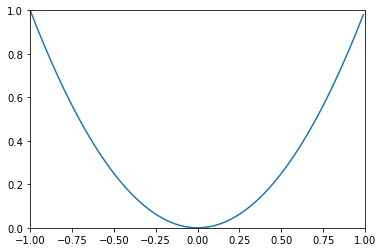

In [1]:
from numpy import arange
from numpy import asarray
from numpy.random import rand
import matplotlib.pyplot as plt

def objective(x):
  return x**2.0

def derivative(x):
  return x*2.0

x = arange(-1,1,0.01)
y = [i*i for i in x]

plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.plot(x, y, markersize=1)
plt.show()

Iteration ==>0 f(-0.768) = 0.58982


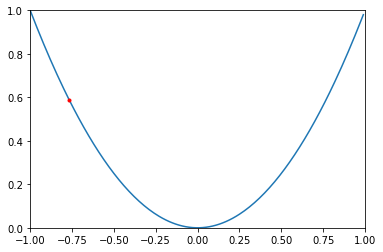

Iteration ==>1 f(-0.6144000000000001) = 0.37749


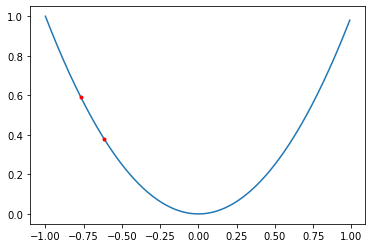

Iteration ==>2 f(-0.49152000000000007) = 0.24159


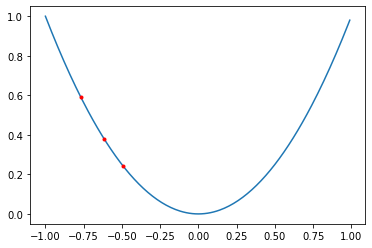

Iteration ==>3 f(-0.39321600000000007) = 0.15462


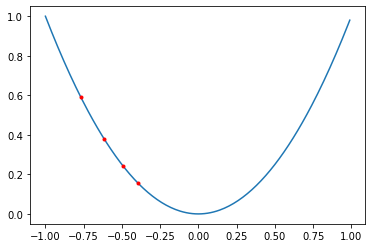

Iteration ==>4 f(-0.31457280000000004) = 0.09896


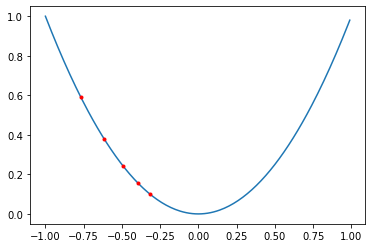

Iteration ==>5 f(-0.25165824000000003) = 0.06333


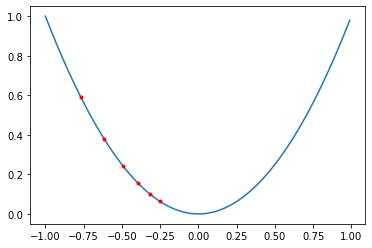

Iteration ==>6 f(-0.20132659200000003) = 0.04053


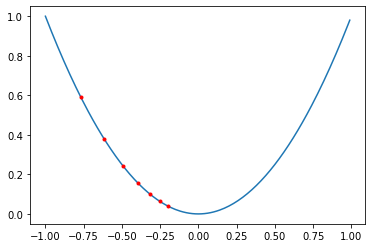

Iteration ==>7 f(-0.16106127360000003) = 0.02594


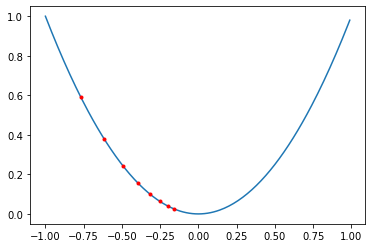

Iteration ==>8 f(-0.12884901888000003) = 0.01660


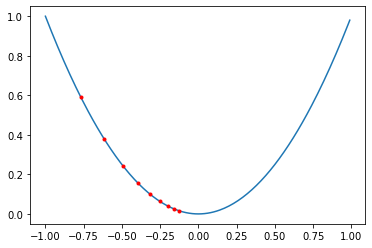

Iteration ==>9 f(-0.10307921510400002) = 0.01063


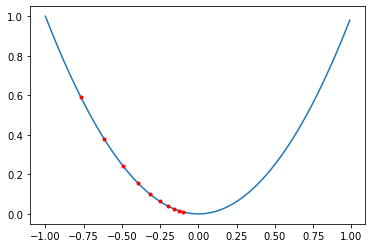

Iteration ==>10 f(-0.08246337208320001) = 0.00680


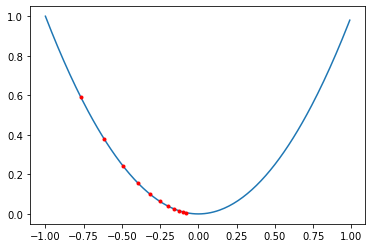

Iteration ==>11 f(-0.06597069766656001) = 0.00435


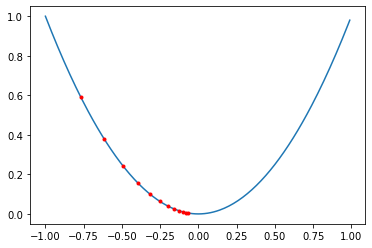

Iteration ==>12 f(-0.05277655813324801) = 0.00279


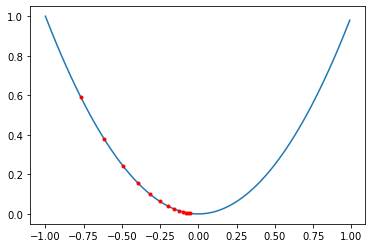

Iteration ==>13 f(-0.042221246506598406) = 0.00178


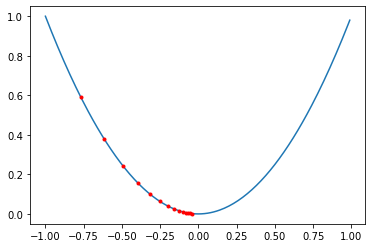

Iteration ==>14 f(-0.03377699720527873) = 0.00114


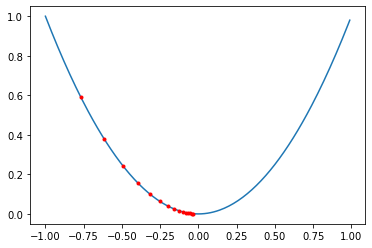

Iteration ==>15 f(-0.02702159776422298) = 0.00073


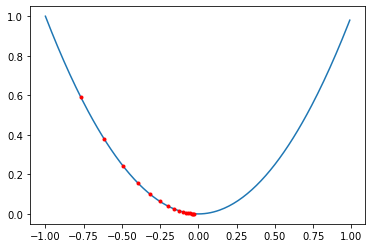

Iteration ==>16 f(-0.021617278211378384) = 0.00047


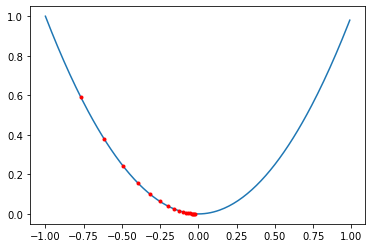

Iteration ==>17 f(-0.017293822569102706) = 0.00030


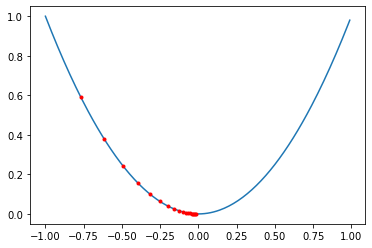

Iteration ==>18 f(-0.013835058055282165) = 0.00019


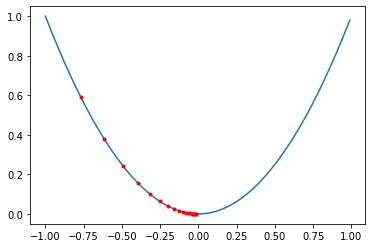

Iteration ==>19 f(-0.011068046444225732) = 0.00012


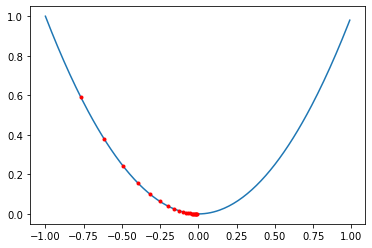

Iteration ==>20 f(-0.008854437155380587) = 0.00008


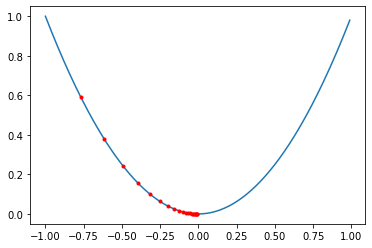

Iteration ==>21 f(-0.0070835497243044694) = 0.00005


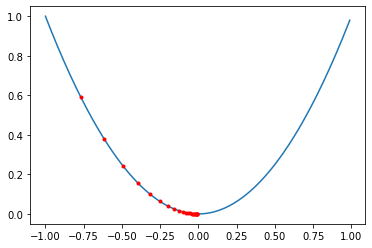

Iteration ==>22 f(-0.0056668397794435756) = 0.00003


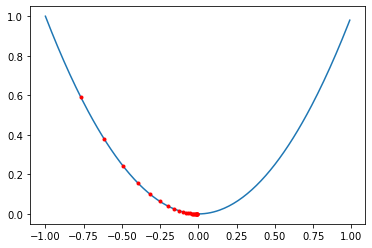

Iteration ==>22 f(-0.0056668397794435756) = 0.00003
Convergence reached!


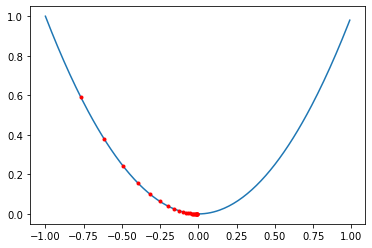

In [2]:
import random as rand
def grad(x):
  solutions, scores = [],[]
  iterations = 30
  step_size = 0.1
  #generate an initial point
  solution = x[rand.randrange(0,len(x)-1)]
  for i in range(iterations):
    gradient = 2*solution
    solution -= step_size * gradient
    solution_eval = solution**2

    solutions.append(solution)
    scores.append(solution_eval)



    print('Iteration ==>%d f(%s) = %.5f' % (i, solution, solution_eval))
    plt.plot(x, y, markersize = 1)
    plt.plot(solutions, scores, '.', color='red')
    plt.show()
    if(solution_eval.round(4) == 0.0000):
      print('Iteration ==>%d f(%s) = %.5f' % (i, solution, solution_eval))
      print("Convergence reached!")
      plt.plot(x, y, markersize = 1)
      plt.plot(solutions, scores, '.', color='red')
      plt.show()
      break
  return [solutions, scores]

plt.xlim(-1,1)
plt.ylim(0,1)
solutions, scores = grad(x)

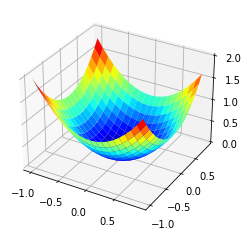

In [3]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
 
# objective function
def objective(x, y):
 return x**2.0 + y**2.0
 
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

In [4]:
 # example of plotting the adagrad search on a contour plot of the test function
from math import sqrt
import numpy
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# objective function
def objective(x, y):
    return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

t = 0
new = numpy.empty(shape=(50, 2), dtype='object')
# gradient descent algorithm with adagrad
def adagrad(objective, derivative, bounds, n_iter, step_size):
    stop = float(1)
    # track all solutions
    solutions = list()
    scores = list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # list of the sum square gradients for each variable
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent
    while (stop != 0.0):
        for it in range(n_iter):
            # calculate gradient
            gradient = derivative(solution[0], solution[1])
            # update the sum of the squared partial derivatives
            for i in range(gradient.shape[0]):
                sq_grad_sums[i] += gradient[i]**2.0
            # build solution
            new_solution = list()
            for i in range(solution.shape[0]):
                # calculate the learning rate for this variable
                alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
                # calculate the new position in this variable
                value = solution[i] - alpha * gradient[i]
                new_solution.append(value)
            # store the new solution
            solution = asarray(new_solution)
            solutions.append(solution)
            # evaluate candidate point
            solution_eval = objective(solution[0], solution[1])
            scores.append(solution_eval)
            # report progress
            print('Iteration ==>%d f(%s) = %.5f' % (it, solution, solution_eval))
            stop = numpy.round(solution_eval, 5)
            stop = float(stop)
            global t
            t = i
            if stop == 0.0:
                break
    return solutions

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)

Iteration ==>0 f([-0.06595599  0.34064899]) = 0.12039
Iteration ==>1 f([-0.02902286  0.27948766]) = 0.07896
Iteration ==>2 f([-0.0129815   0.23463749]) = 0.05522
Iteration ==>3 f([-0.00582483  0.1993997 ]) = 0.03979
Iteration ==>4 f([-0.00261527  0.17071256]) = 0.02915
Iteration ==>5 f([-0.00117437  0.14686138]) = 0.02157
Iteration ==>6 f([-0.00052736  0.12676134]) = 0.01607
Iteration ==>7 f([-0.00023681  0.10966762]) = 0.01203
Iteration ==>8 f([-0.00010634  0.09503809]) = 0.00903
Iteration ==>9 f([-4.77542704e-05  8.24607972e-02]) = 0.00680
Iteration ==>10 f([-2.14444463e-05  7.16123835e-02]) = 0.00513
Iteration ==>11 f([-9.62980437e-06  6.22327049e-02]) = 0.00387
Iteration ==>12 f([-4.32434258e-06  5.41085063e-02]) = 0.00293
Iteration ==>13 f([-1.94188148e-06  4.70624414e-02]) = 0.00221
Iteration ==>14 f([-8.72017797e-07  4.09453989e-02]) = 0.00168
Iteration ==>15 f([-3.91586740e-07  3.56309531e-02]) = 0.00127
Iteration ==>16 f([-1.75845235e-07  3.10112252e-02]) = 0.00096
Iteration =

Iteration ==>  0


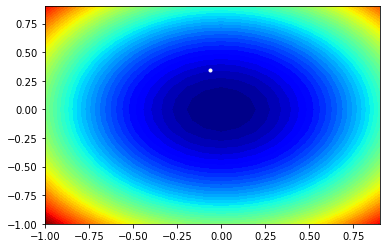

Iteration ==>  1


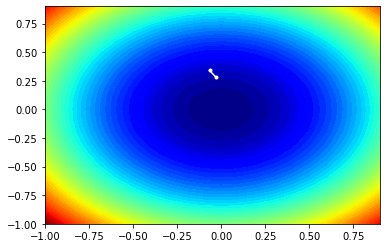

Iteration ==>  2


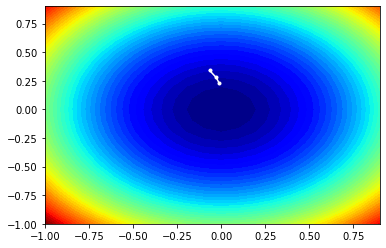

Iteration ==>  3


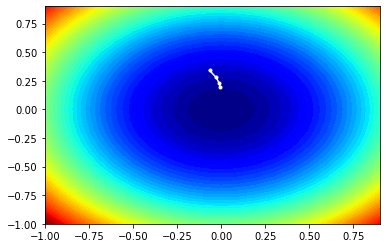

Iteration ==>  4


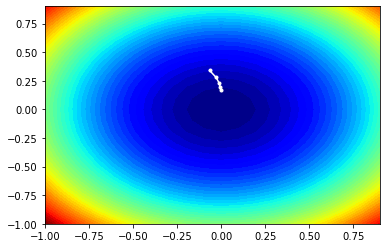

Iteration ==>  5


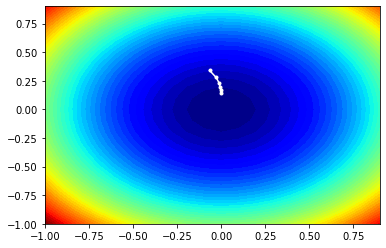

Iteration ==>  6


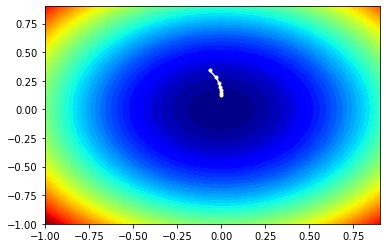

Iteration ==>  7


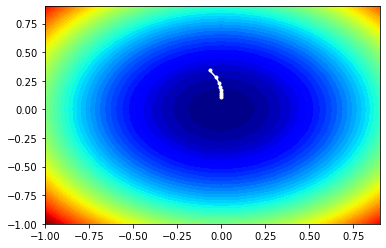

Iteration ==>  8


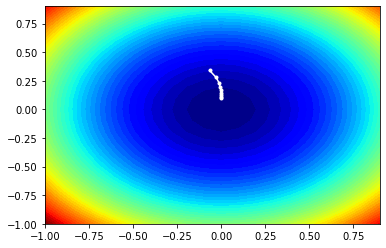

Iteration ==>  9


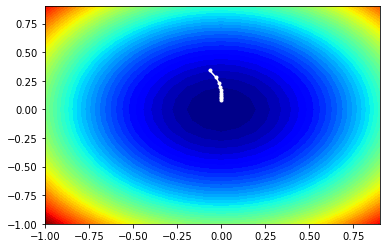

Iteration ==>  10


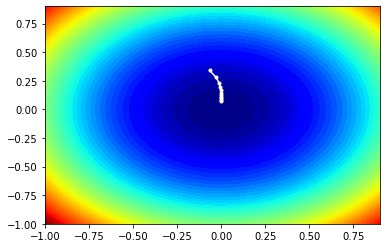

Iteration ==>  11


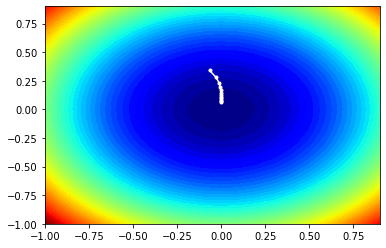

Iteration ==>  12


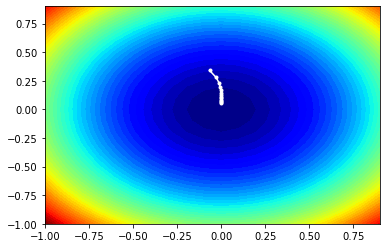

Iteration ==>  13


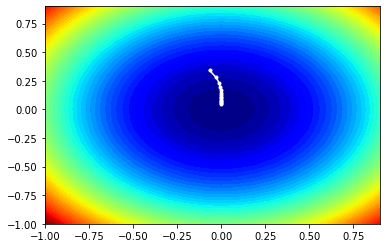

Iteration ==>  14


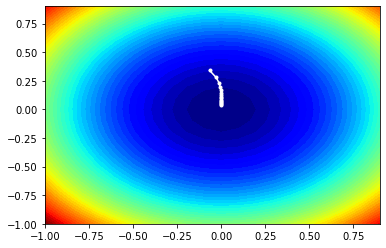

Iteration ==>  15


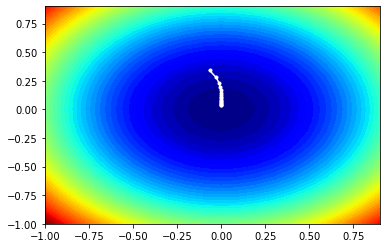

Iteration ==>  16


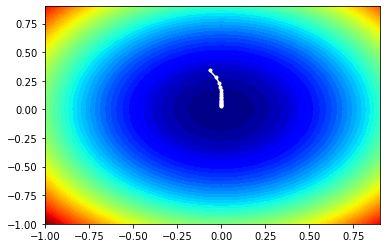

Iteration ==>  17


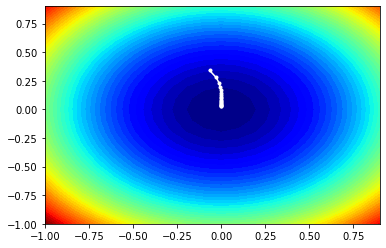

Iteration ==>  18


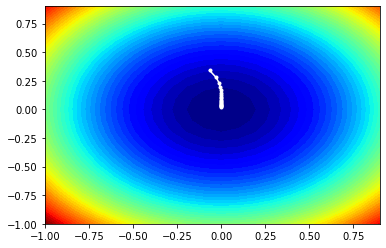

Iteration ==>  19


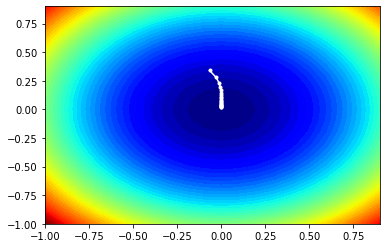

Iteration ==>  20


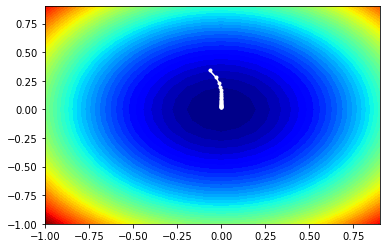

Iteration ==>  21


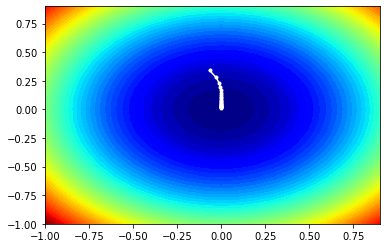

Iteration ==>  22


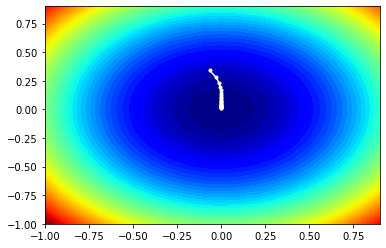

Iteration ==>  23


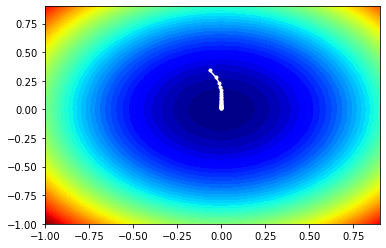

Iteration ==>  24


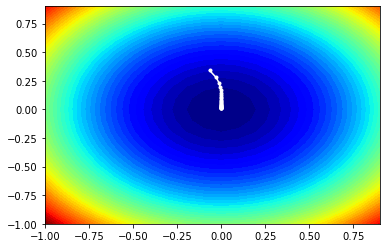

Iteration ==>  25


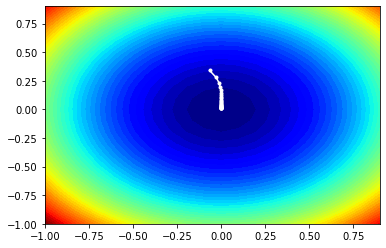

Iteration ==>  26


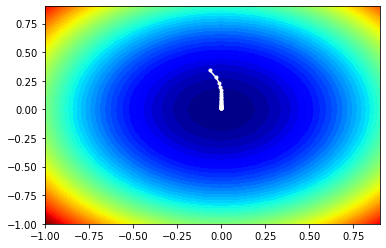

Iteration ==>  27


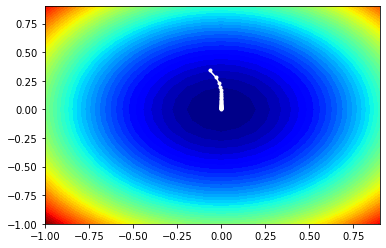

Iteration ==>  28


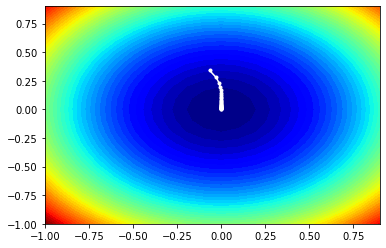

Iteration ==>  29


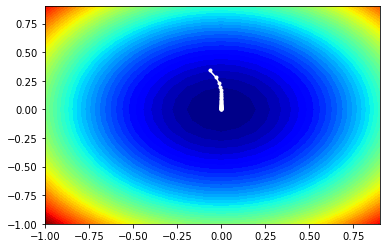

Iteration ==>  30


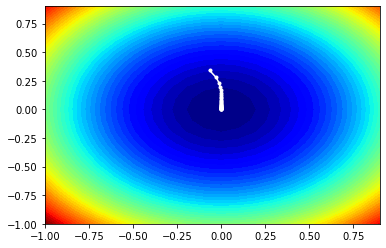

Iteration ==>  31


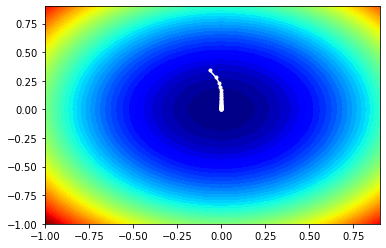

Iteration ==>  32


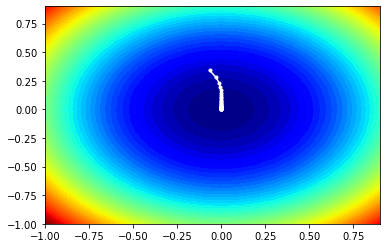

Iteration ==>  33


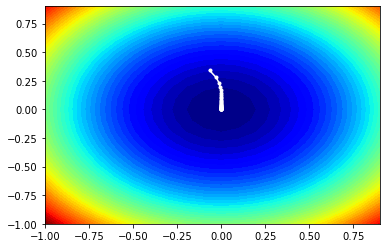

Iteration ==>  34


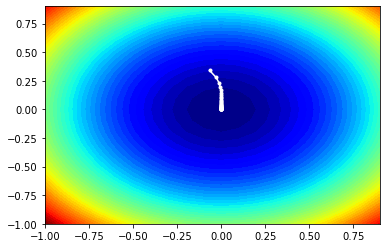

Iteration ==>  35


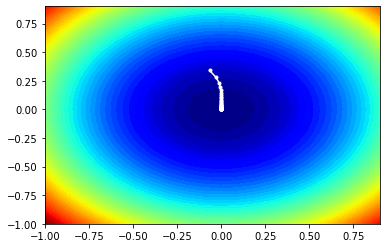

In [5]:
import numpy as np
results = objective(x,y)
pyplot.contourf(x, y, results, levels=50, cmap='jet')
solutions = asarray(solutions)
solutions = np.array(solutions)
new = np.empty(shape=(50, 2), dtype='object')
for i in range(len(solutions)):
    print('Iteration ==> ',i)
    new[i][0] = solutions[i][0]
    new[i][1] = solutions[i][1]
    pyplot.contourf(x, y, results, levels=50, cmap='jet')
    pyplot.plot(new[:,0], new[:,1], '.-', color='w')
    pyplot.show()